In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Scanpy config
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.0 pandas==1.1.0 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0


In [3]:
# Read in the clustered flux analysis data
master_dir = ''
adata = sc.read_h5ad(master_dir + 'data/PBMC/fo8_thru_in8_PRO_for_CD4.h5ad')

In [4]:
celltype = 'cd4'
adata_gex = sc.read_h5ad(master_dir + 'output/' + celltype + '-processed-analyzed.h5ad')
adata_gex_metab = sc.read_h5ad(master_dir + 'output/' + celltype + '-processed-analyzed-metab.h5ad')

In [5]:
# All the proteins
for name in adata.var_names:
    print(name)

CD80-1
CD86-1
CD274_B7-H1_PD-L1
CD273_B7-DC_PD-L2
CD275_B7-H2_ICOSL
CD11B
CD252_OX40L
CD137L_4-1BB_Ligand
CD155_PVR
CD112_NECTIN-2
CD47-1
CD70-1
CD30
CD40-1
CD154
CD52-1
CD3
CD8
CD56_NCAM
CD19-1
CD33-1
CD11C
CD34-1
CD269_BCMA
HLA-A-B-C
CD90_Thy1
CD117_c-Kit
CD10
CD45RA
CD123
CD7-1
CD49F
CD194_CCR4
CD4-1
CD44-1
CD14-1
CD16
CD25
CD45RO
CD279_PD-1
TIGIT_VSTM3
Mouse_IgG1_Isotype-Control
Mouse_IgG2a_Isotype-Control
Mouse_IgG2b_Isotype-Control
Rat_IgG2b_Isotype-Control
CD20
CD335_NKp46
CD294_CRTH2
CD326_Ep-CAM
CD31
Podoplanin
CD146
CD324_E-Cadherin
IgM
CD5-1
TCR-G-D
CD183_CXCR3
CD195_CCR5
CD32
CD196_CCR6
CD185_CXCR5
CD103_Integrin-AE
CD69-1
CD62L
CD197_CCR7
CD161
CD152_CTLA-4
CD223_LAG-3
KLRG1_MAFA
CD27-1
CD107A_LAMP-1
CD95-FAS
HLA-DR
CD1C-1
CD64
CD141_Thrombomodulin
CD1D-1
CD314_NKG2D
CD66B
CD35
CD57_Recombinant
CD366_Tim-3
CD272_BTLA
CD278_ICOS
CD58_LFA-3
CD96_TACTILE
CD39
CD178_FAS-L
CX3CR1-1
CD24-1
CD21
CD11A
IgA
CD79_IgB
CD66A-C-E
CD244_2B4
CD235AB
CD206_MMR
CD169_Sialoadhesin_Siglec-1


In [6]:
adata_gex = adata_gex[adata_gex.obs.index.isin(adata.obs.index)]
adata_gex_metab = adata_gex_metab[adata_gex_metab.obs.index.isin(adata.obs.index)]

/usr/lusers/jlee712/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [7]:
# Bring protein markers to adata_gex and adata_gex_metab
markers = ['CD49F', 'CD45RA', 'CD45RO', 'HLA-DR', 'CD278_ICOS', 'CD95-FAS', 'CD224', 'CD244_2B4']
for marker in markers:
    adata_gex.obs[marker] = np.array(adata[:, marker].X.todense()).flatten()
    adata_gex_metab.obs[marker] = np.array(adata[:, marker].X.todense()).flatten()

Trying to set attribute `.obs` of view, copying.
/usr/lusers/jlee712/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.obs` of view, copying.
/usr/lusers/jlee712/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/lusers/jlee712/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/lusers/jlee712/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future ve

In [8]:
(adata_gex.obs['CD45RA'] / adata_gex.obs['CD45RO']).describe()

count    5.141300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      9.076349e-01
50%      1.045903e+00
75%      1.227938e+00
max               inf
dtype: float64

In [9]:
adata_gex.obs['CD45RA/CD45RO'] = (adata_gex.obs['CD45RA']) / (adata_gex.obs['CD45RO'])
adata_gex_metab.obs['CD45RA/CD45RO'] = adata_gex.obs['CD45RA/CD45RO'].copy()

In [10]:
adata_gex.obs['louvain_metab'] = adata_gex_metab.obs['louvain']
adata_gex_metab.obs['leiden_all'] = adata_gex.obs['leiden']

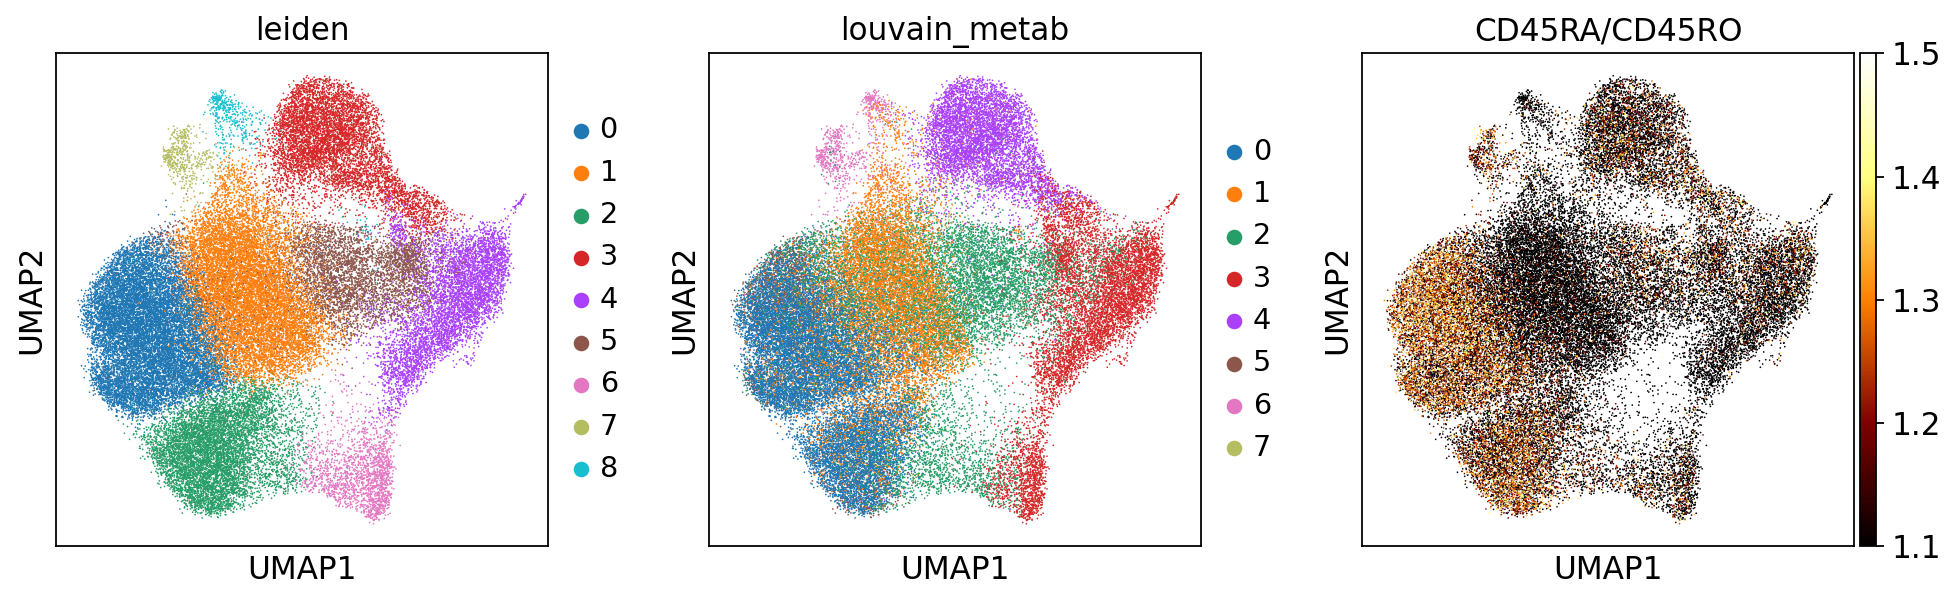

In [12]:
sc.pl.umap(adata_gex, color=['leiden', 'louvain_metab', #'CD45RA', 'CD45RO', 'CD197_CCR7', 'CD62L', 'CD95-FAS',
                             'CD45RA/CD45RO'], cmap='afmhot', vmin=1.1, vmax=1.5)

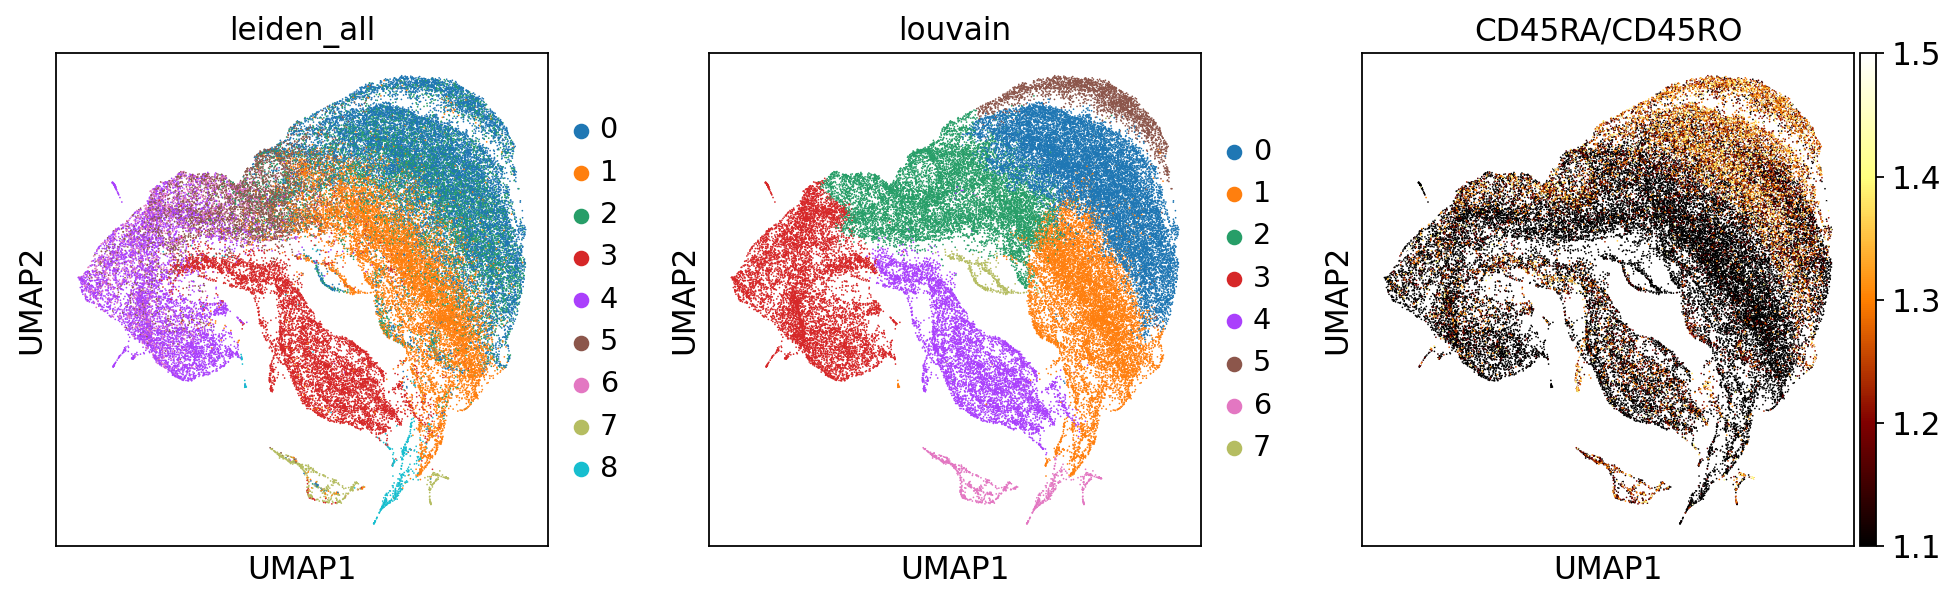

In [13]:
sc.pl.umap(adata_gex_metab, color=['leiden_all', 'louvain', #'CD45RA', 'CD45RO', 'CD197_CCR7', 'CD62L', 'CD95-FAS',
                             'CD45RA/CD45RO'], cmap='afmhot', vmin=1.1, vmax=1.5)

/usr/lusers/jlee712/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


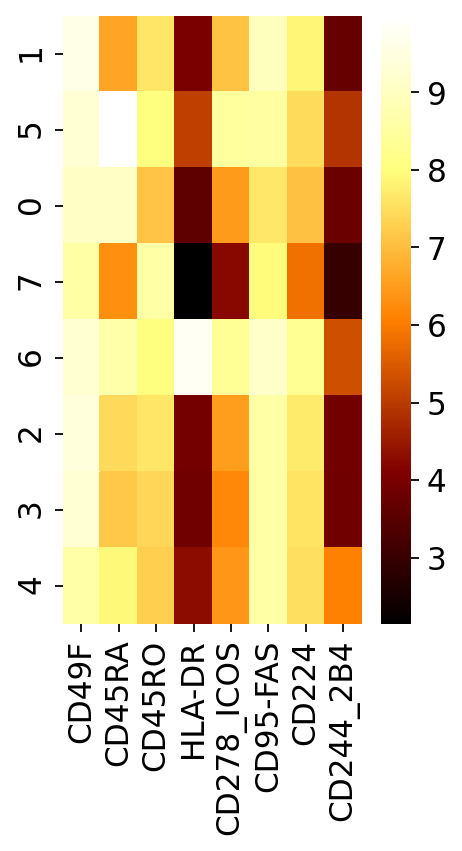

In [14]:
df = pd.DataFrame(columns=adata_gex.obs['louvain_metab'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers, index=markers), df, left_index=True, right_index=True)
df = df.drop(columns=0)
# Reproduce ordering of clusters from metabolic gene clustermap
df = df.loc[:, ['1', '5', '0', '7', '6', '2', '3', '4']]
#sns.clustermap(df.transpose(), col_cluster=False, cmap='plasma', figsize=(3, 5))
fig = plt.figure(figsize=(3, 5))
fig = sns.heatmap(df.transpose(), cmap='afmhot')

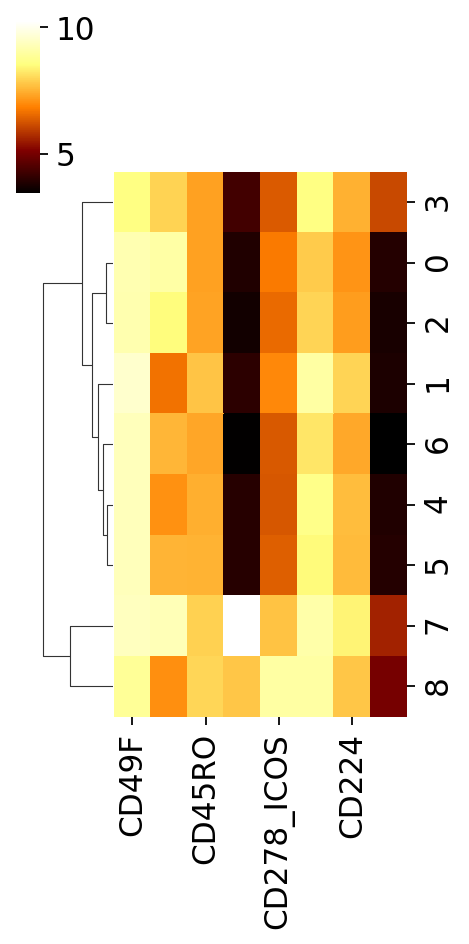

In [16]:
df = pd.DataFrame(columns=adata_gex.obs['leiden'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['leiden']==col].obs.loc[:, markers], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers, index=markers), df, left_index=True, right_index=True)
df = df.drop(columns=0)
sns.clustermap(df.transpose(), col_cluster=False, cmap='afmhot', figsize=(3, 6))
#sns.heatmap(df)

In [33]:
np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers], axis=0)

CD45RA        9.322036
CD45RO        7.384694
CD197_CCR7    8.111589
CD62L         7.282682
CD95-FAS      7.964256
dtype: float32